In [2]:
# pip install
!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use(['science','no-latex'])
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")
DPI=800

Imported all.


In [6]:
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
# Open data file
file_dir = "./assets/shielding_5cm/A_Z_vol_count-all.txt"
df_shielding = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_shielding)
# Reorder columns
df_shielding = df_shielding[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Q-Values","Plot Colour",]]
df_shielding = df_shielding[df_shielding["Stable"] == False]

# Open data file
file_dir = "./assets/FTFP_5cm/A_Z_vol_count-all.txt"
df_FTFP = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_FTFP)
# Reorder columns
df_FTFP = df_FTFP[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Q-Values","Plot Colour",]]
df_FTFP = df_FTFP[df_FTFP["Stable"] == False]

In [7]:
# Add production
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
day_in_nano = (8.64 * 10 ** 13)
sim_length = 29.01
df_shielding["Production (/yr)"] = df_shielding["Counts"] / sim_length
df_FTFP["Production (/yr)"] = df_FTFP["Counts"] / sim_length

# Get total counts

Normalised log plot of no. of counts per physics model:
Ratio
Total production per year (shielding): 392851.1547742159
Total production per year (FTFP): 391960.2206135816
Shielding:FTFP: 1:0.9977321330233931


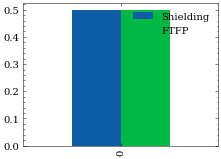

In [8]:
print("Normalised log plot of no. of counts per physics model:")
df_counts = pd.DataFrame({"Shielding": [df_shielding['Production (/yr)'].sum() / (df_shielding['Production (/yr)'].sum() + df_FTFP['Production (/yr)'].sum())],
                          "FTFP": [df_FTFP['Production (/yr)'].sum() / (df_shielding['Production (/yr)'].sum() + df_FTFP['Production (/yr)'].sum())]})
df_counts.plot.bar()
print("Ratio")
print(f"Total production per year (shielding): {df_shielding['Production (/yr)'].sum()}")
print(f"Total production per year (FTFP): {df_FTFP['Production (/yr)'].sum()}")
print(f"Shielding:FTFP: 1:{df_FTFP['Production (/yr)'].sum() / df_shielding['Production (/yr)'].sum()}")
plt.show()

# Ratio between volumes

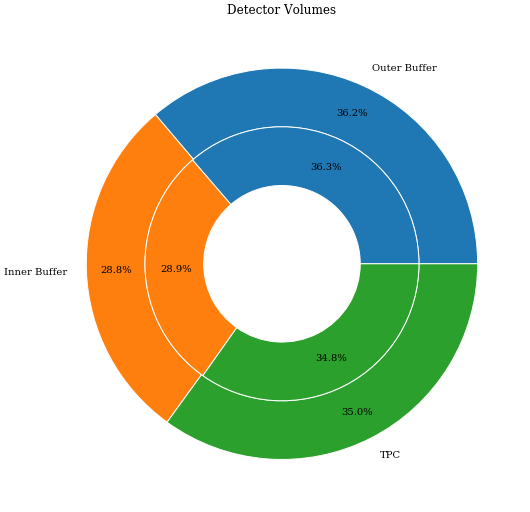

In [9]:
fig, ax = plt.subplots(figsize=(18,9))
size = 0.3
labels=["Outer Buffer", "Inner Buffer", "TPC"]
ax.pie(x=[df_FTFP.loc[df_FTFP["Detector Volume"] == 7,"Production (/yr)"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 9,"Production (/yr)"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 11,"Production (/yr)"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       labels=labels,
       radius=1,
       autopct='%1.1f%%',
       pctdistance=1 - size / 2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(x=[df_shielding.loc[df_shielding["Detector Volume"] == 7,"Production (/yr)"].sum(),
           df_shielding.loc[df_shielding["Detector Volume"] == 9,"Production (/yr)"].sum(),
           df_shielding.loc[df_shielding["Detector Volume"] == 11,"Production (/yr)"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       radius=1 - size, 
       autopct='%1.1f%%',
       pctdistance= 1 - 3 * size/4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(title='Detector Volumes')
plt.show()

# Prompt & delayed

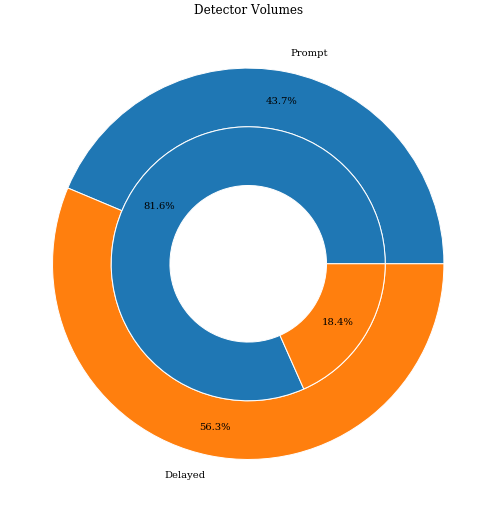

In [10]:
file_dir = f"./assets/shielding_5cm/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt_s = open_data(file_dir, columns)
file_dir = f"./assets/shielding_5cm/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed_s = open_data(file_dir, columns)
file_dir = f"./assets/FTFP_5cm/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt_f = open_data(file_dir, columns)
file_dir = f"./assets/FTFP_5cm/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed_f = open_data(file_dir, columns)

fig, ax = plt.subplots(figsize=(18,9))
size = 0.3
labels=["Prompt", "Delayed"]
ax.pie(x=[df_TPC_prompt_s["Counts"].sum(), df_TPC_delayed_s["Counts"].sum()],
       colors = ['tab:blue', 'tab:orange'],
       labels=labels,
       radius=1,
       autopct='%1.1f%%',
       pctdistance=1 - size / 2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(x=[df_TPC_prompt_f["Counts"].sum(), df_TPC_delayed_f["Counts"].sum()],
       colors = ['tab:blue', 'tab:orange'],
       radius=1 - size, 
       autopct='%1.1f%%',
       pctdistance= 1 - 3 * size/4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(title='Detector Volumes')
plt.show()

# Get yields of each isotope

In [43]:
df_shielding_counts = df_shielding.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_FTFP_counts = df_FTFP.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_combined_counts = pd.concat([df_shielding_counts, df_FTFP_counts], axis=1).reset_index()
print(f"Average: {df_combined_counts['Production (/yr)'].mean()}")

Average: Production (/yr)    18707.197846
Production (/yr)    17041.748722
dtype: float64


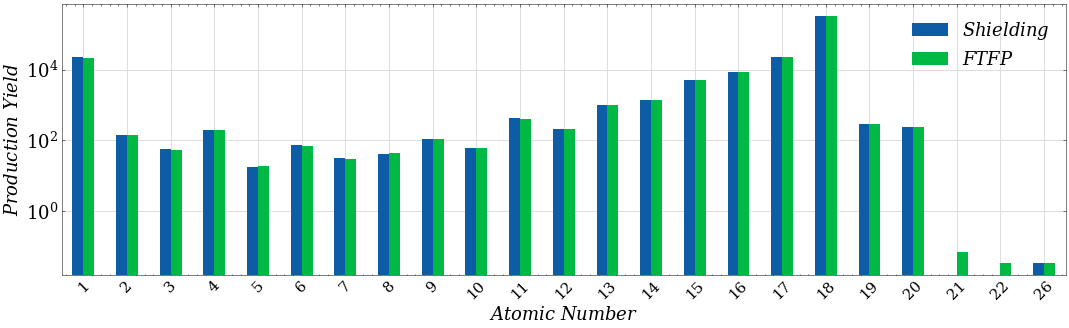

In [41]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.rcParams.update({'font.size': 18})
ax = df_combined_counts.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
ax.set_ylabel(r"$Production~Yield$")
ax.set_xlabel(r"$Atomic~Number$")
plt.xticks(rotation=45, fontsize="small")
plt.legend(labels=[r"$Shielding$",r"$FTFP$"])
#plt.title("Total Isotope Yields")
plt.savefig('./img/total-iso-yields', dpi=DPI)
plt.show()
#df_shielding_counts, df_FTFP_counts

C:\Users\u1942937\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\u1942937\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


Atomic Number
1       0.555191
2       2.366218
3       1.210053
4       0.661784
5       1.225259
6       4.674255
7       5.146652
8       2.080783
9       0.015359
10      1.176471
11      0.099124
12      1.033485
13      0.256882
14      0.246054
15      0.164431
16      0.130974
17      0.010658
18      0.088943
19      0.442581
20      0.656580
21    100.000000
22    100.000000
26      0.000000
Name: Production (/yr), dtype: float64


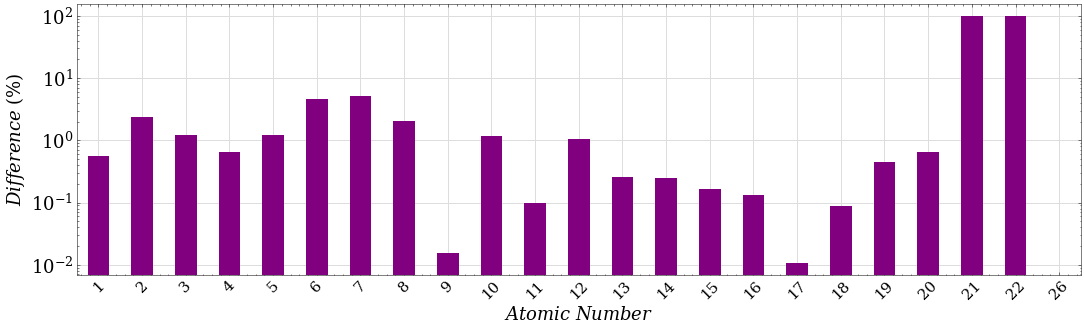

(Atomic Number
 1      22088.796967
 2        145.398139
 3         56.221992
 4        194.036539
 5         18.062737
 6         74.491555
 7         32.747329
 8         41.365047
 9        112.202689
 10        62.254395
 11       417.718028
 12       210.617029
 13       995.553257
 14      1383.522923
 15      4976.559807
 16      8709.789728
 17     23289.417442
 18    329505.170631
 19       297.276801
 20       239.917270
 26         0.034471
 21         0.000000
 22         0.000000
 Name: Production (/yr), dtype: float64,
 Atomic Number
 1      21844.881075
 2        138.676319
 3         54.877628
 4        196.621855
 5         18.510858
 6         67.838676
 7         29.541537
 8         43.123061
 9        112.237160
 10        60.806618
 11       416.890727
 12       206.308170
 13       990.451568
 14      1390.348156
 15      4960.220614
 16      8687.004481
 17     23284.453637
 18    328919.544984
 19       294.657015
 20       243.088590
 21         0.068942
 22  

In [46]:
# Difference graph
df_shielding_counts.set_value(21, 0)
df_shielding_counts.set_value(22, 0)
average = abs(df_shielding_counts + df_FTFP_counts) / 2
difference = abs(df_shielding_counts - df_FTFP_counts)
percentage = difference / average / 2 * 100

print(percentage)
f, ax = plt.subplots(figsize=(18,5))
percentage.plot.bar(x="Atomic Number", color="purple", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
ax.set_ylabel(r"$Difference~(\%)$")
ax.set_xlabel(r"$Atomic~Number$")
plt.xticks(rotation=45, fontsize="small")
#plt.title("Total Isotope Yields")
plt.savefig('./img/total-iso-yields_differences', dpi=DPI)
plt.show()
df_shielding_counts, df_FTFP_counts

In [14]:
print("Ordered Isotope yields:\n")
print("hielding:      ", list(df_shielding_counts.sort_values(ascending=False).index))
print("FTFP:    ", list(df_FTFP_counts.sort_values(ascending=False).index))

Ordered Isotope yields:

hielding:       [18, 17, 1, 16, 15, 14, 13, 11, 19, 20, 12, 4, 2, 9, 6, 10, 3, 8, 7, 5, 26]
FTFP:     [18, 17, 1, 16, 15, 14, 13, 11, 19, 20, 12, 4, 2, 9, 6, 10, 3, 8, 7, 5, 21, 22, 26]


# Compare important isotopes

In [15]:
df_shielding_imp = pd.read_csv(f"./assets/shielding_5cm/important_iso.csv")
df_FTFP_imp = pd.read_csv(f"./assets/FTFP_5cm/important_iso.csv")
min_b_e = 0
max_b_e = 100
df_shielding_b = df_shielding_imp[df_shielding_imp[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]
df_FTFP_b = df_FTFP_imp[df_FTFP_imp[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]

KeyError: 'BDecay 0-100 (keV)'

In [ ]:
df_shielding_b_counts = df_shielding_b.groupby(['Atomic Number'])["Production (/yr)"].sum()
df_FTFP_b_counts = df_FTFP_b.groupby(['Atomic Number'])["Production (/yr)"].sum()
temp = pd.concat([df_shielding_b_counts, df_FTFP_b_counts], axis=1).reset_index()
ax = temp.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
ax.set_ylabel(r"$Counts$")
ax.set_xlabel(r"$Atomic Number$")
#plt.title("Important Beta Productions (/yr)")
plt.legend(labels=[r"$Shielding$",r"$FTFP$"])
plt.show()